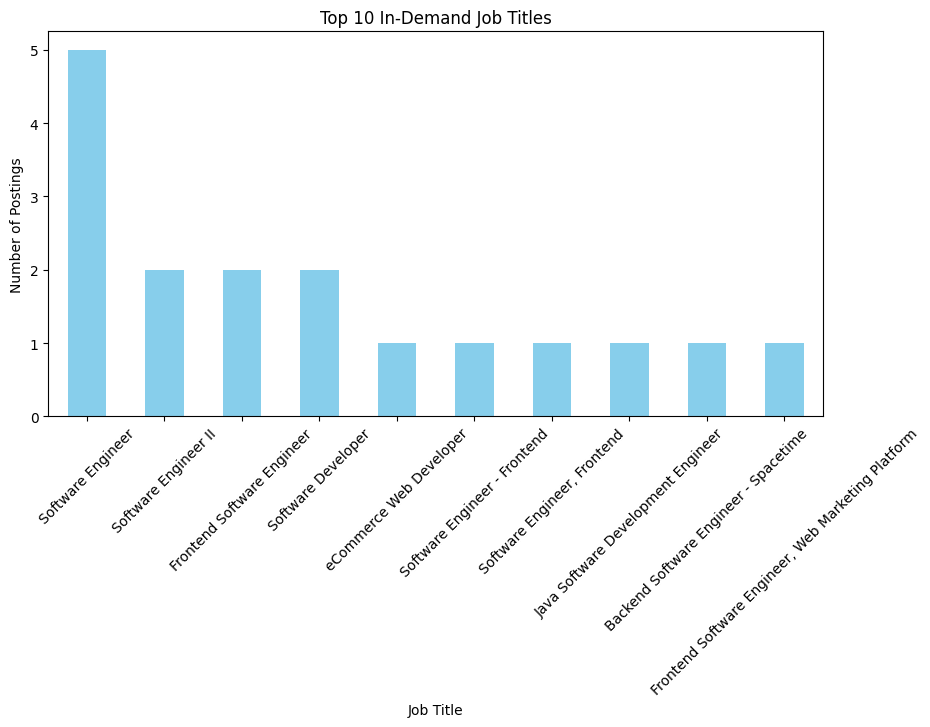

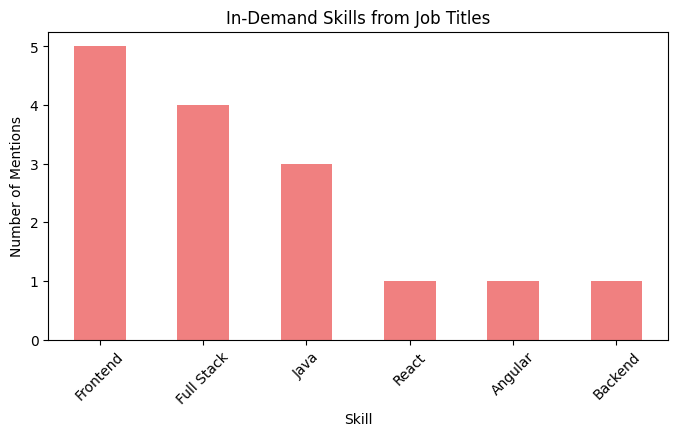

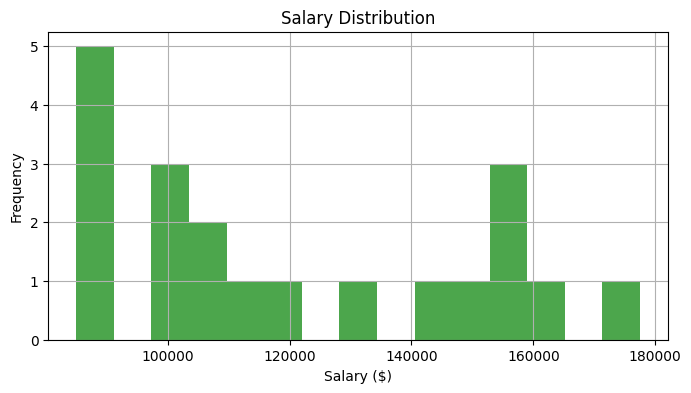


Top Job Titles:
 title
Software Engineer                                     5
Software Engineer II                                  2
Frontend Software Engineer                            2
Software Developer                                    2
eCommerce Web Developer                               1
Software Engineer - Frontend                          1
Software Engineer, Frontend                           1
Java Software Development Engineer                    1
Backend Software Engineer - Spacetime                 1
Frontend Software Engineer, Web Marketing Platform    1
Name: count, dtype: int64

Top Skills:
 Frontend      5
Full Stack    4
Java          3
React         1
Angular       1
Backend       1
Name: count, dtype: int64

Salary Statistics:
                                                          min       max  \
title                                                                    
Back End Developer                                  120000.0  120000.0   
Backend Sof

In [5]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load job postings data
with open("job_postings.json", "r", encoding="utf-8") as f:
    job_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(job_data)

# Remove "N/A" entries
df = df[df["title"] != "N/A"]

# Function to clean salary values
def parse_salary(salary):
    if "Not Provided" in salary or "N/A" in salary:
        return None
    numbers = re.findall(r"\d{2,}", salary.replace(",", ""))
    numbers = list(map(int, numbers))
    
    if "hour" in salary:
        return sum(numbers) / len(numbers) * 40 * 52  # Convert hourly to yearly
    return sum(numbers) / len(numbers) if numbers else None

# Apply salary cleaning function
df["parsed_salary"] = df["salary"].apply(parse_salary)

# Count job titles
title_counts = df["title"].value_counts()

# Extract top in-demand technologies
skills = ["Java", "React", "Angular", "Python", "Backend", "Frontend", "Full Stack"]
df["skills"] = df["title"].apply(lambda x: [s for s in skills if s.lower() in x.lower()])
skills_counts = pd.Series([s for sublist in df["skills"] for s in sublist]).value_counts()

# Salary statistics
salary_stats = df.groupby("title")["parsed_salary"].agg(["min", "max", "mean", "median"]).dropna()

# Plot job trends
plt.figure(figsize=(10, 5))
title_counts[:10].plot(kind="bar", color="skyblue")
plt.title("Top 10 In-Demand Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45)
plt.show()

# Plot skill trends
plt.figure(figsize=(8, 4))
skills_counts.plot(kind="bar", color="lightcoral")
plt.title("In-Demand Skills from Job Titles")
plt.xlabel("Skill")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.show()

# Plot salary distribution
plt.figure(figsize=(8, 4))
df["parsed_salary"].dropna().hist(bins=15, color="green", alpha=0.7)
plt.title("Salary Distribution")
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.show()

# Display summary
print("\nTop Job Titles:\n", title_counts.head(10))
print("\nTop Skills:\n", skills_counts)
print("\nSalary Statistics:\n", salary_stats)
